<a href="https://colab.research.google.com/github/anaapbernardo/Bootcamp_DataScience/blob/main/Ana_Bernardo_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Author: Ana Paula da Silva Bernardo*

## **Summary**

This notebook contains the Project from the second module of Alura's Bootcamp of Applied Data Science.

The project is an analysis of the vaccination rate, number of cases, and the number of deaths due to meningitis in Brazil.

## **Introduction**

### **Meningitis**

### 1.   What is it?

Meningitis as the name says is an inflammation meninges, which are three membranes that surround and protect the brain, spinal cord and other parts of the central nervous system. Meningitis can be caused by virus, bacteria, or fungi. The transmission occurs by the respiratory tract, through droplets and secretions from the nose and throat. It can affect people of all ages, but children and the elderly deserve attention.

### 2.   Types of Meningitis

**Viral meningitis** is milder and the symptoms are similar to flu and cold. The disease mainly affects children, and there is no specific treatment and medication.

**Bacterial meningitis** is more severe, and in addition to attacking the brain, can affect the respiratory system, the heart, bones, and even blood. The treatment is through antibiotics applied directly into the patient's vein, and its administration should begin as soon as possible to avoid complications and sequelae.

**Fungal meningitis**, caused by fungi or the tuberculosis bacillus, requires prolonged treatment based on oral or intravenous antibiotics and chemotherapy.

### 3.   How to prevent?

- **Keep vaccination up to date;**
- Avoid places with crowds of people;
- Leave the rooms ventilated, if possible sunny, mainly classrooms, workplaces and public transportation;
- Do not share objects for personal use;
- Reinforce hygiene habits, washing hands frequently, especially before meals.

### 4.   Vaccines

In Brazil, there are different vaccines to prevent meningitis, and they have changed throughout the years, as new and improved vaccines were developed.

Until 2002, the vaccine used to prevent meningitis caused by the bacteria *Haemophilus influenzae* type b (Hib) was:
- **Haemophilus influenzae b:** 3 doses applied to babies at age of 2, 4, and 6 months.

From 2002 to 2015, the *Haemophilus influenzae* b vaccine was included in another vaccine called:
- **Tetravalente (DTP/Hib):** 3 doses applied to babies at age of 2, 4, and 6 months, and 2 reinforcements applied one at 15 months and another between 4 and 6 years old.

Since 2015, the Tetravalente (DTP/Hib) was replaced by the **Pentavalente**, which prevents 5 diseases (diphtheria, tetanus, whooping cough, hepatitis B, and Haemophilus influenzae type B). 

Currently, in Brazil there are four types of vaccines to prevent meningitis offered by SUS, they are:
- **BCG:** 1 dose applied to newborns
- **Pentavalente:** 3 doses applied to babies at age of 2, 4, and 6 months.
- **Pneumocócica:** 2 doses applied to babies at age of 2 and 4 months, and a reinforcement applied between 12 months and 4 years old.
- **Meningocócica C*:** 2 doses applied to babies at age of 3 and 5 months, and a reinforcement applied between 12 months and 4 years old. In addition, 1 dose is applied to teenagers at age of 11 to 14 years.

**A new vaccine for teenagers was included at SUS in 2020. The vaccine is called Meningocócica ACWY, and prevent from 4 types of meningitis (A, C, W, Y). This vaccine will substitute the Meningocócica C, and will be applied to teenagers between 11 and 12 years old. However, data related to this vaccine is not included in the dataset yet.*


---


The Brazilian vaccination program can be seen on the links:

**Newborn:** https://sbim.org.br/images/calendarios/calend-sbim-prematuro.pdf

**Children:** https://sbim.org.br/images/calendarios/calend-sbim-crianca.pdf

**Teenagers:** https://sbim.org.br/images/calendarios/calend-sbim-adolescente.pdf

---

**Sources:**

http://bvsms.saude.gov.br/ultimas-noticias/3177-24-4-dia-mundial-da-meningite-derrotar-a-meningite

https://summitsaude.estadao.com.br/desafios-no-brasil/dia-mundial-de-combate-a-meningite-a-importancia-da-imunizacao/

https://www.conass.org.br/consensus/queda-da-imunizacao-brasil/

---

## **Preliminary Analysis**

### Initial procedures

Importing libraries:

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

Links to the datasets used:

In [ ]:
# url

vaccines = 'https://raw.githubusercontent.com/anaapbernardo/Bootcamp_DataScience/main/Files%20-%20Bootcamp%20Data%20Science/Vaccines_Meningitis_cpnibr16070024671.csv'
vaccination_per_region = 'https://raw.githubusercontent.com/anaapbernardo/Bootcamp_DataScience/main/Files%20-%20Bootcamp%20Data%20Science/Vacines_Meningitis_Region_cpnibr16072379470.csv'
cases_per_region = 'https://raw.githubusercontent.com/anaapbernardo/Bootcamp_DataScience/main/Files%20-%20Bootcamp%20Data%20Science/Cases_Meningitis_Region_A071645189_28_143_208.csv'
cases_per_age_gender = 'https://raw.githubusercontent.com/anaapbernardo/Bootcamp_DataScience/main/Files%20-%20Bootcamp%20Data%20Science/Cases_Meningitis2008_Age_Gender_A040708189_28_143_208.csv'
deaths_per_region = 'https://raw.githubusercontent.com/anaapbernardo/Bootcamp_DataScience/main/Files%20-%20Bootcamp%20Data%20Science/Deaths_Meningitis_Region_Year_A042122189_28_143_208.csv'
brazilian_population = 'https://github.com/anaapbernardo/Bootcamp_DataScience/blob/main/Files%20-%20Bootcamp%20Data%20Science/BrazilianPopulation_2001_2020_IBGE.xls?raw=true'


Defining a function to clean and sort the data frames:

In [ ]:
# Cleaning and sorting a data frame

def clean_and_sort(df, col, new_col, sorted_col):
  df = df.rename(columns={col:new_col})
  df = df.set_index(new_col)

  if df.index.str[:2][0].isnumeric():
    df.index = df.index.str[3:]
  
  if df.index.str[:1][0].isnumeric():
    df.index = df.index.str[2:]
  
  df = df.sort_values(sorted_col, ascending=False)
  df = df.drop([sorted_col], axis=1)

  return df

Defining a function to melt and organize the data frames:

In [ ]:
# Melting and organizing a data frame

def melt_and_organize(df, col_reg, col_year, col_value):

  df = df.reset_index().melt(id_vars=col_reg, value_vars=df.columns)
  df.columns = [col_reg, col_year, col_value]
  df = df.sort_values([col_reg, col_year], ascending=True)
  df = df.astype({col_reg: 'str', col_year: 'int'})
  df = df.set_index([col_reg, col_year])

  return df

### Reading and cleaning the datasets

In [ ]:
# Reading the datasets

df_vaccines = pd.read_csv(vaccines, encoding='ISO-8859-1', sep=';', decimal=',', skipfooter=1, na_values=0.00, engine='python')
df_vaccination_rate = pd.read_csv(vaccination_per_region, encoding='ISO-8859-1', sep=';', thousands='.', decimal=',', skipfooter=1, engine='python')
df_cases_age = pd.read_csv(cases_per_age_gender, encoding='ISO-8859-1', sep=';', thousands='.', decimal=',', skiprows=3, skipfooter=20, engine='python')
df_cases = pd.read_csv(cases_per_region, encoding='ISO-8859-1', sep=';', thousands='.', decimal=',', skiprows=3, skipfooter=21, na_values='-', engine='python')
df_deaths = pd.read_csv(deaths_per_region, encoding='ISO-8859-1', sep=';', thousands='.', decimal=',', skiprows=4, skipfooter=7, na_values='-', engine='python')
df_population = pd.read_excel(brazilian_population, skiprows=4, skipfooter=10)


In [ ]:
# Cleaning and sorting the data frames

df_vaccines = clean_and_sort(df_vaccines, 'Imuno', 'immuno', ' Total')
df_cases_age = df_cases_age.drop(columns=['Ignorado', 'Total'], index=[0, 12])

# Vaccination rate
df_vaccination_rate = clean_and_sort(df_vaccination_rate, 'Região', 'Region', ' Total')
vaccination_rate_region = df_vaccination_rate.sort_index(ascending=True)

# Meningitis cases since 2008
df_cases = clean_and_sort(df_cases, 'Região de notificação', 'Region', 'Total')
meningitis_cases = df_cases[df_cases.columns[33:45]]
meningitis_cases = meningitis_cases.sort_index(ascending=True)

#Meningitis deaths since 2008
df_deaths = clean_and_sort(df_deaths, 'Região', 'Region', 'Total')
deaths_region = df_deaths.drop(columns='2020')
deaths_region = deaths_region.sort_index(ascending=True)

# Brazilian population from 2008 to 2019
pop_region = df_population.iloc[[2, 10, 20, 25, 29]]
pop_region = clean_and_sort(pop_region, 'Unidades da Federação', 'Region', 2020)
pop_region = pop_region[pop_region.columns[7:]]


In [ ]:
# Melting and organizing the data frames

pop_region_melt = melt_and_organize(pop_region, 'Region', 'Year', 'Population')
vaccination_rate_melt = melt_and_organize(vaccination_rate_region, 'Region', 'Year', 'Vaccination_Rate')
cases_region_melt = melt_and_organize(meningitis_cases, 'Region', 'Year', 'Cases')
deaths_region_melt = melt_and_organize(deaths_region, 'Region', 'Year', 'Deaths')

## **Data Analysis and Visualization**

#### Meningitis Vaccines

As mentioned in the introduction, the meningitis vaccines that are currently applied in Brazil are:

- BCG
- Penta
- Pneumocócica
- Meningococo C

**Therefore, this preliminary analysis will use only the data related to these 4 vaccines.**

*So, the data collected before 2013 can be removed from the data frame. Also, the data for 2020 are not yet completed, and it is not possible to know the vaccination rate will be reached in the current year. So, the data for 2020 will be removed as well.*

In [ ]:
# Removing the vaccines that are not applied anymore
meningitis_vaccines = df_vaccines.drop(index=['Tetravalente (DTP/Hib) (TETRA)', 'Haemophilus influenzae b'])

# Selecting columns from 2013 to 2019
columns_2013_2019 = meningitis_vaccines.columns[19:26]

meningitisVaccines_since2013 = meningitis_vaccines[columns_2013_2019]
meningitisVaccines_since2013

,2013,2014,2015,2016,2017,2018,2019
immuno,,,,,,,
BCG,107.42,107.28,105.08,95.55,97.98,99.72,86.67
Meningococo C (1º ref),92.35,88.55,87.85,93.86,78.56,80.22,85.78
Pneumocócica,93.57,93.45,94.23,95.00,92.15,95.25,89.07
Pneumocócica(1º ref),93.11,87.95,88.35,84.10,76.31,81.99,83.47
Penta,95.89,94.85,96.30,89.27,84.24,88.49,70.76
Meningococo C,99.70,96.36,98.19,91.68,87.44,88.49,87.41


In [ ]:
meningitisVaccines_since2013_melt = meningitisVaccines_since2013.reset_index().melt(id_vars=['immuno'], value_vars=meningitisVaccines_since2013.columns)
meningitisVaccines_since2013_melt.columns = ['immuno', 'year', 'vaccination_rate']
meningitisVaccines_since2013_melt.head()

,immuno,year,vaccination_rate
0,BCG,2013,107.42
1,Meningococo C (1º ref),2013,92.35
2,Pneumocócica,2013,93.57
3,Pneumocócica(1º ref),2013,93.11
4,Penta,2013,95.89


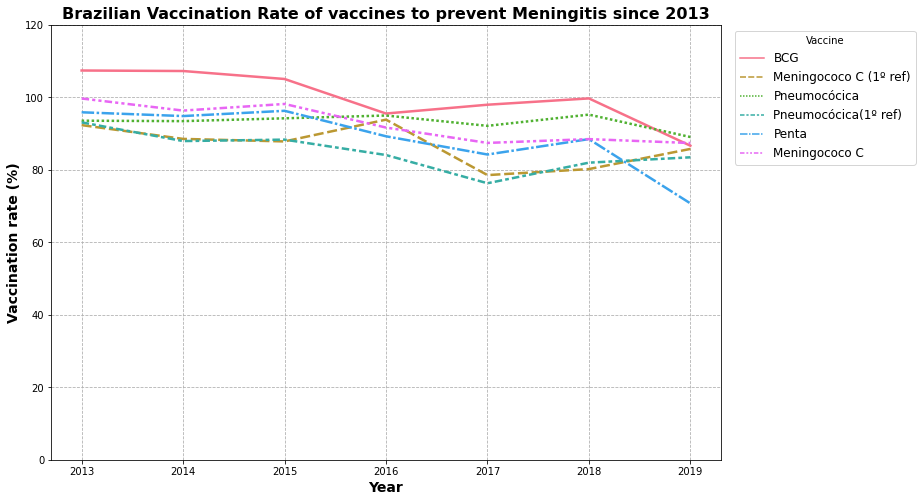

In [ ]:
plt.figure(figsize=(12,8))
ax_vaccines = sns.lineplot(data=meningitisVaccines_since2013_melt, x='year', y='vaccination_rate', 
                  hue='immuno', style='immuno', palette='husl', linewidth=2.5)

# Parameters for x-label
plt.xlabel('Year', fontsize=14, fontweight='bold')

# Parameters for y-label
plt.ylim(0, 120)
plt.ylabel('Vaccination rate (%)', fontsize=14, fontweight='bold')

# Other parameters
plt.title('Brazilian Vaccination Rate of vaccines to prevent Meningitis since 2013', fontsize=16, fontweight='bold')
plt.legend(title='Vaccine', fontsize=12, loc='upper right',  bbox_to_anchor=(1.3, 1))
plt.grid(linestyle="--")

plt.show()

Observing the graph above it is possible to notice a decrease in the vaccination rate since 2015. 

This fact is quite worrying since vaccination is one of the most effective methods of preventing various diseases, not only in Brazil but worldwide. Immunization is the only way to ensure that eradicated diseases do not return.

#### Vaccination rate per region

Evaluating the vaccination rate for meningitis* since 2008 in each region.

*Sum of the rate of all Meningitis vaccines

*The dataset used had the information from 2008 until 2020. However, the data from 2020 was not completed, so it was removed.*

In [ ]:
vaccination_rate_region

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Region,,,,,,,,,,,,
Região Centro-Oeste,79.81,80.41,61.88,102.82,78.51,104.34,102.27,93.82,88.67,85.58,90.31,86.54
Região Nordeste,75.79,77.89,64.57,94.18,75.71,94.56,92.11,94.40,77.54,84.63,90.05,83.13
Região Norte,81.95,84.76,64.67,87.26,74.00,87.65,84.87,82.78,71.62,78.28,78.06,82.90
Região Sudeste,83.87,90.45,68.52,102.02,77.67,98.98,96.99,98.23,80.18,88.63,90.99,82.53
Região Sul,76.81,82.70,60.84,105.36,78.16,101.13,97.94,97.81,81.94,88.40,89.11,88.33


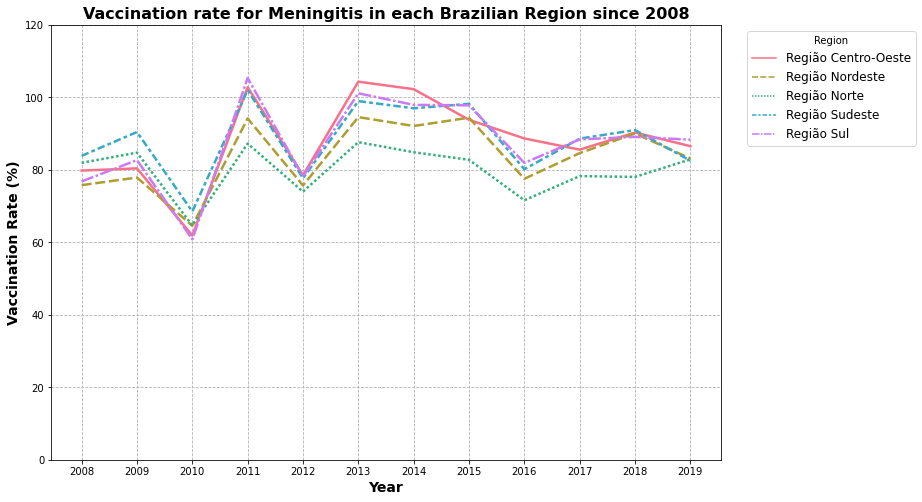

In [ ]:
plt.figure(figsize=(12,8))
ax_vaccinationRate = sns.lineplot(data=vaccination_rate_region.T, palette='husl', linewidth=2.5)

# Parameters for x-label
plt.xlabel('Year', fontsize=14, fontweight='bold')

# Parameters for y-label
plt.ylim(0, 120)
plt.ylabel('Vaccination Rate (%)', fontsize=14, fontweight='bold')

# Other parameters
plt.title('Vaccination rate for Meningitis in each Brazilian Region since 2008', fontsize=16, fontweight='bold')
plt.legend(title='Region', fontsize=12, loc='upper right',  bbox_to_anchor=(1.3, 1))
plt.grid(linestyle="--")

plt.show()

The graph above confirms that the vaccination rate is decreasing in every region of Brazil since 2015. Also, is it possible to observe a drop in vaccination in 2010 and 2012. 

So, the next step will be to evaluate the number of cases since 2008, and check if there is any pattern which correlates the vaccination rate and the number of meningitis cases.

#### Meningitis cases per region

Evaluating the meningitis cases per region.

In [ ]:
meningitis_cases

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Region,,,,,,,,,,,,
Região Centro-Oeste,1163,1111,1009,992,1039,912,810,816,806,750,621,673
Região Nordeste,5935,5169,4025,4274,4578,3675,2868,2569,2113,2343,2301,2423
Região Norte,987,940,701,730,723,770,739,847,793,890,842,757
Região Sudeste,11753,10725,11022,10955,12184,10355,9986,8232,8828,8954,10063,8358
Região Sul,4504,4140,3779,3850,3283,3556,3300,3623,3125,4080,3739,3770


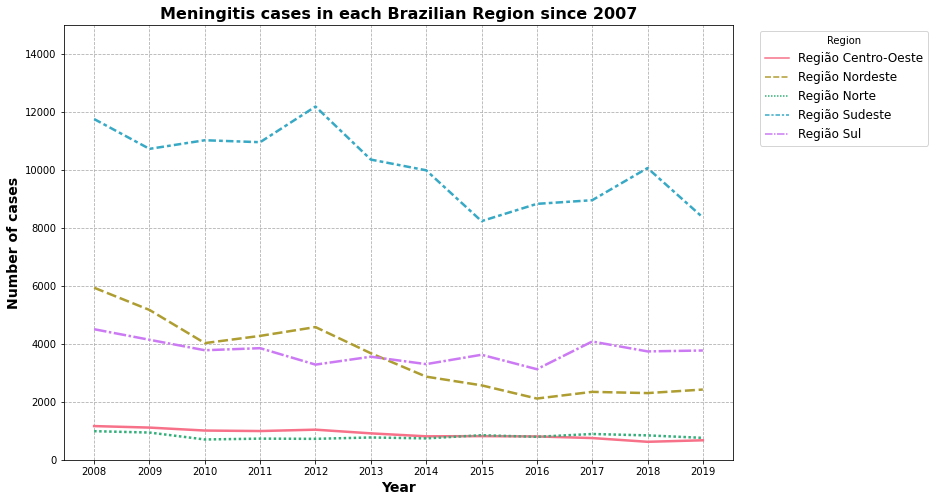

In [ ]:
plt.figure(figsize=(12, 8))
ax_cases = sns.lineplot(data=meningitis_cases.T, palette='husl', linewidth=2.5)

# Parameters for x-label
plt.xlabel('Year', fontsize=14, fontweight='bold')

# Parameters for y-label
plt.ylim(0, 15000)
plt.ylabel('Number of cases', fontsize=14, fontweight='bold')

# Other parameters
plt.title('Meningitis cases in each Brazilian Region since 2007', fontsize=16, fontweight='bold')
plt.legend(title='Region', fontsize=12, loc='upper right',  bbox_to_anchor=(1.3, 1))
plt.grid(linestyle="--")

plt.show()

The Midwest and North showed a slight decrease in the number of cases over the years. The Southeast and Northeast had a decrease in the cases from 2008 until 2015 and 2016, respectively. However, it is possible to notice an increase in the number of meningitis cases in the Southeast, South, and Northeast regions after 2016. Therefore, this increase in the numbers since 2016 can be related to the decrease in the vaccination rates.

#### Age group and gender of meningitis cases between 2008 and 2019

In [ ]:
cases_age_gender = df_cases_age.set_index('Faixa Etária')

In [ ]:
casesAgeGender_melt = cases_age_gender.reset_index().melt(id_vars='Faixa Etária', value_vars=['Masculino', 'Feminino'])
casesAgeGender_melt.columns = ['Age_Range', 'Gender', 'Cases']

In [ ]:
casesAgeGender_melt.head()

,Age_Range,Gender,Cases
0,<1 Ano,Masculino,19555
1,1-4,Masculino,25330
2,5-9,Masculino,20653
3,10-14,Masculino,10996
4,15-19,Masculino,7564


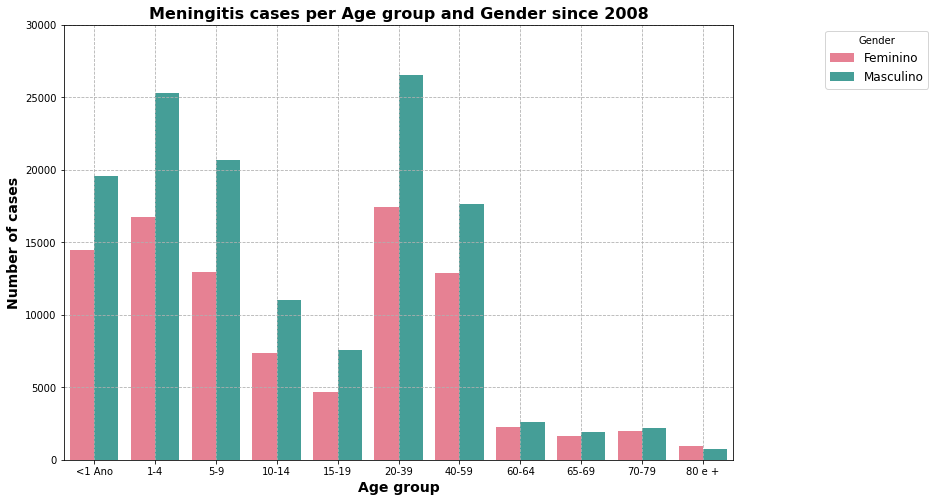

In [ ]:
plt.figure(figsize=(12,8))
ax_casesAge_gender = sns.barplot(data=casesAgeGender_melt, x='Age_Range', y='Cases', hue='Gender', hue_order=['Feminino', 'Masculino'],  palette='husl')

# Parameters for x-label
plt.xlabel('Age group', fontsize=14, fontweight='bold')

# Parameters for y-label
plt.ylim(0, 30000)
plt.ylabel('Number of cases', fontsize=14, fontweight='bold')

# Other parameters
plt.title('Meningitis cases per Age group and Gender since 2008', fontsize=16, fontweight='bold')
plt.legend(title='Gender', fontsize=12, loc='upper right',  bbox_to_anchor=(1.3, 1))
plt.grid(linestyle="--")

plt.show()

According to the graph above the highest number of cases occurs in children up to 10 years old (summing the age groups < 1 to 5-9). Also, meningitis seems to affect more males than females.

#### Number of deaths due to Meningitis in each Brazilian Region

In [ ]:
deaths_region

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Region,,,,,,,,,,,,
Região Centro-Oeste,35,33,39,48,49,35,41,38,54,58,39,36
Região Nordeste,76,95,97,105,104,84,85,133,139,114,125,139
Região Norte,29,21,38,27,20,26,23,35,60,42,37,49
Região Sudeste,240,245,240,228,222,209,272,287,319,272,270,243
Região Sul,106,90,95,88,58,75,113,149,123,110,136,128


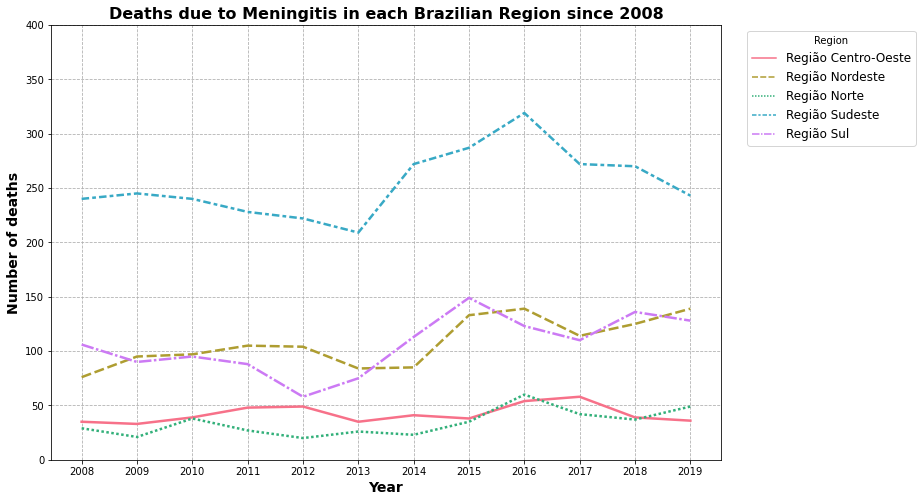

In [ ]:
plt.figure(figsize=(12,8))
ax_deaths = sns.lineplot(data=deaths_region.T, palette='husl', linewidth=2.5)

# Parameters for x-label
plt.xlabel('Year', fontsize=14, fontweight='bold')

# Parameters for y-label
plt.ylim(0, 400)
plt.ylabel('Number of deaths', fontsize=14, fontweight='bold')

# Other parameters
plt.title('Deaths due to Meningitis in each Brazilian Region since 2008', fontsize=16, fontweight='bold')
plt.legend(title='Region', fontsize=12, loc='upper right',  bbox_to_anchor=(1.3, 1))
plt.grid(linestyle="--")

plt.show()

From the graph above is possible to observe a constant increase in the number of meningitis in the Southeast, South, and Northeast since 2013. While, the North and Midwest regions seems to have a stable number of cases. This results is consistent with the number of cases in each region previous showed in this notebook.

#### Meningitis cases and deaths per 100000 inhabitants

Merging the 'melted' data frames to create another data frame containing the Brazilian population, and vaccination rate, number of cases, and deaths due to meningitis.

In [ ]:
pop_vac = pop_region_melt.merge(vaccination_rate_melt, right_index=True, left_index=True)
pop_vac_cases = pop_vac.merge(cases_region_melt, right_index=True, left_index=True)
pop_vac_cases_deaths = pop_vac_cases.merge(deaths_region_melt, right_index=True, left_index=True)

Add the number of cases and deaths per 100000 inhabitants.

In [ ]:
pop_vac_cases_deaths['Cases_per_inhab'] = pop_vac_cases_deaths['Cases'] / pop_vac_cases_deaths['Population'] * 100000
pop_vac_cases_deaths['Deaths_per_inhab'] = pop_vac_cases_deaths['Deaths'] / pop_vac_cases_deaths['Population'] * 100000

In [ ]:
pop_vac_cases_deaths

Population  ...  Deaths_per_inhab
Region              Year              ...                  
Região Centro-Oeste 2008  13695944.0  ...          0.255550
                    2009  13895375.0  ...          0.237489
                    2010  14050340.0  ...          0.277573
                    2011  14244192.0  ...          0.336979
                    2012  14423952.0  ...          0.339713
                    2013  14993191.0  ...          0.233439
                    2014  15219608.0  ...          0.269389
                    2015  15442232.0  ...          0.246078
                    2016  15660988.0  ...          0.344806
                    2017  15875907.0  ...          0.365333
                    2018  16085885.0  ...          0.242449
                    2019  16297074.0  ...          0.220899
Região Nordeste     2008  53088499.0  ...          0.143157
                    2009  53591197.0  ...          0.177268
                    2010  53078137.0  ...          0.182749
                    2011  53501859.0  ...          0.196255
                    2012  53907144.0  ...          0.192924
                    2013  55794707.0  ...          0.150552
                    2014  56186190.0  ...          0.151283
                    2015  56560081.0  ...          0.235148
                    2016  56915936.0  ...          0.244220
                    2017  57254159.0  ...          0.199112
                    2018  56760780.0  ...          0.220222
                    2019  57071654.0  ...          0.243553
Região Norte        2008  15142684.0  ...          0.191512
                    2009  15359608.0  ...          0.136722
                    2010  15880839.0  ...          0.239282
                    2011  16095187.0  ...          0.167752
                    2012  16318163.0  ...          0.122563
                    2013  16983484.0  ...          0.153090
                    2014  17231027.0  ...          0.133480
                    2015  17472636.0  ...          0.200313
                    2016  17707783.0  ...          0.338834
                    2017  17936201.0  ...          0.234163
                    2018  18182253.0  ...          0.203495
                    2019  18430980.0  ...          0.265857
Região Sudeste      2008  80187717.0  ...          0.299298
                    2009  80915332.0  ...          0.302786
                    2010  80353724.0  ...          0.298679
                    2011  80975616.0  ...          0.281566
                    2012  81565983.0  ...          0.272172
                    2013  84465570.0  ...          0.247438
                    2014  85115623.0  ...          0.319565
                    2015  85745520.0  ...          0.334711
                    2016  86356952.0  ...          0.369397
                    2017  86949714.0  ...          0.312824
                    2018  87711946.0  ...          0.307826
                    2019  88371433.0  ...          0.274976
Região Sul          2008  27497970.0  ...          0.385483
                    2009  27719118.0  ...          0.324686
                    2010  27384815.0  ...          0.346908
                    2011  27562433.0  ...          0.319275
                    2012  27731644.0  ...          0.209147
                    2013  28795762.0  ...          0.260455
                    2014  29016114.0  ...          0.389439
                    2015  29230180.0  ...          0.509747
                    2016  29439773.0  ...          0.417802
                    2017  29644948.0  ...          0.371058
                    2018  29754036.0  ...          0.457081
                    2019  29975984.0  ...          0.427009

[60 rows x 6 columns]

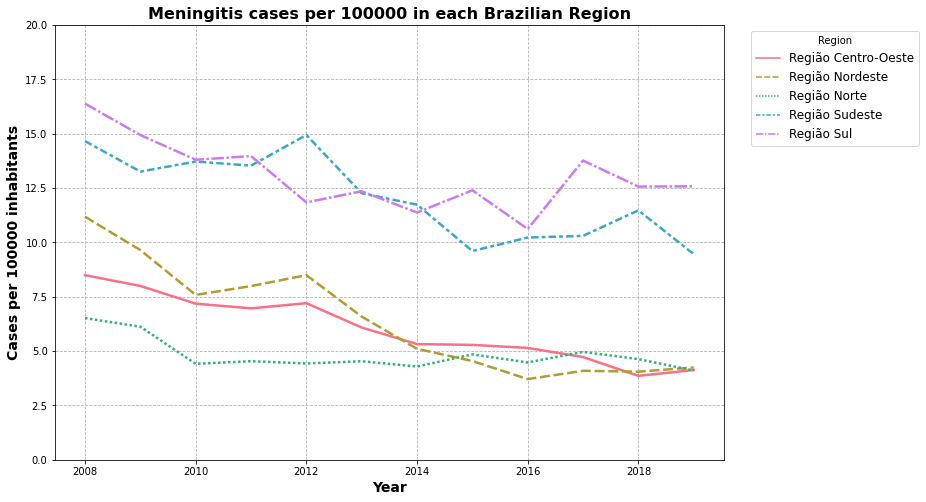

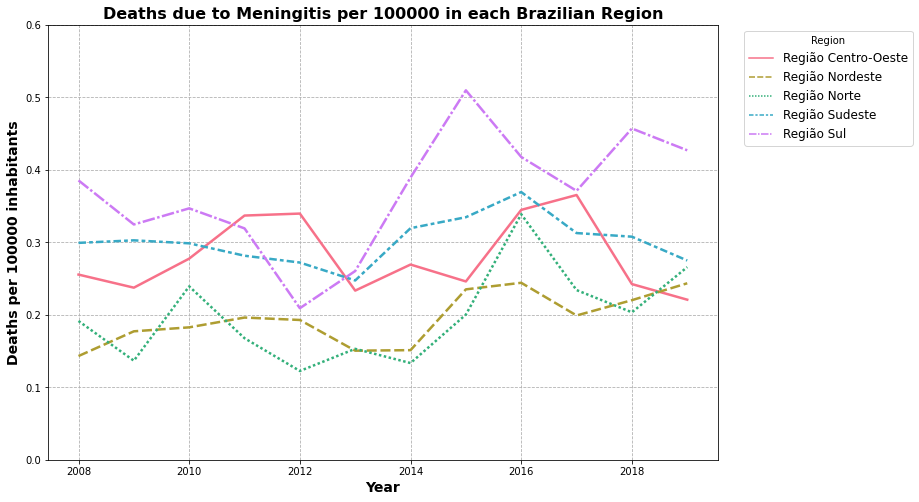

In [ ]:
# Cases
plt.figure(figsize=(12,8))
ax_cases_inhab = sns.lineplot(data=pop_vac_cases_deaths, x='Year', y='Cases_per_inhab', hue='Region', style='Region', palette='husl', linewidth=2.5)

# Parameters for x-label
plt.xlabel('Year', fontsize=14, fontweight='bold')

# Parameters for y-label
plt.ylim(0, 20)
plt.ylabel('Cases per 100000 inhabitants', fontsize=14, fontweight='bold')

# Other parameters
plt.title('Meningitis cases per 100000 in each Brazilian Region', fontsize=16, fontweight='bold')
plt.legend(title='Region', fontsize=12, loc='upper right',  bbox_to_anchor=(1.3, 1))
plt.grid(linestyle="--")

plt.show()


#Deaths
plt.figure(figsize=(12,8))
ax_deaths_inhab = sns.lineplot(data=pop_vac_cases_deaths, x='Year', y='Deaths_per_inhab', hue='Region', style='Region', palette='husl', linewidth=2.5)

# Parameters for x-label
plt.xlabel('Year', fontsize=14, fontweight='bold')

# Parameters for y-label
plt.ylim(0, 0.6)
plt.ylabel('Deaths per 100000 inhabitants', fontsize=14, fontweight='bold')

# Other parameters
plt.title('Deaths due to Meningitis per 100000 in each Brazilian Region', fontsize=16, fontweight='bold')
plt.legend(title='Region', fontsize=12, loc='upper right',  bbox_to_anchor=(1.3, 1))
plt.grid(linestyle="--")

plt.show()

According to the graphs above it is possible to confirm that the number of cases and deaths due to meningitis are increasing in the South region since 2014. While in the other states the number of cases seem to be decreasing in the past 6 years. 

## **Conclusion**

In this project I analyzed the Meningitis vaccines, vaccination rate, age and gender group, and number of cases and deaths per region.

According to the results it was clear that the Meningitis vaccinations rate are decreasing in Brazil, specially since 2016. This decreasing in vaccination is appearing to be correlated to the increasing of the Meningitis cases, and consequently deaths.

Meningitis is a serious disease and affects mainly children. If not treated quickly, it can result in sequelae such as organ damage, hearing loss, brain damage, learning difficulties, loss of limbs (for example, legs), and even death. The best way to prevent is through vaccination.

As mentioned before, the immunization throught vaccines is the best method to prevent the return and spread of several diseases. Also, it is important to emphasize that Brazil is one of the few countries in the world that offers several types of vaccines free of any charge, through SUS and National Immunization Program.

Therefore, it is extremely important to make the population aware of the risks and consequences of do not follow the vaccines calendar, and encourage vaccination.